In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn as sk
import pandas as pd
import seaborn as sns




In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [5]:
print(f'Training sample:\n {train_images[0]}\n')
print(f'Training label:\n {train_labels[0]}\n')



Training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1 

In [7]:
train_images[0].shape, train_labels[0].shape

((28, 28), ())

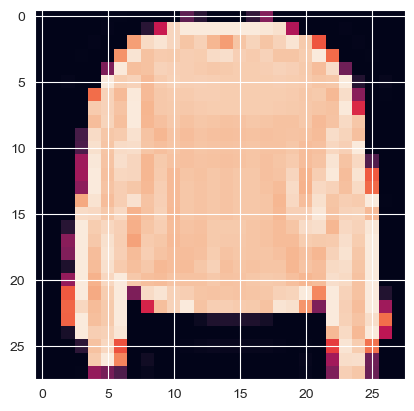

In [11]:
import matplotlib.pyplot as plt
plt.imshow(train_images[7])

In [12]:
train_labels[0]

9

In [13]:
# Create a small list so we can index onto our training labels so they're human readable

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

In [15]:
# Plot an example image and its label
def plot_image(index_of_choice):
    plt.imshow(train_images[index_of_choice ], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[index_of_choice ]])


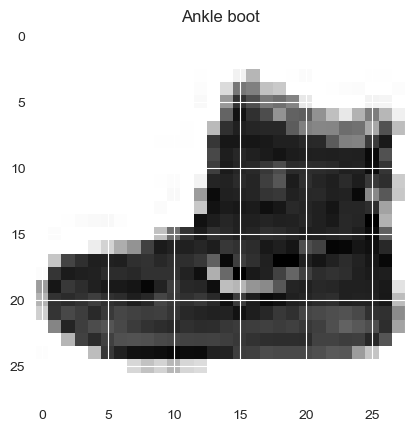

In [18]:
plot_image(0)

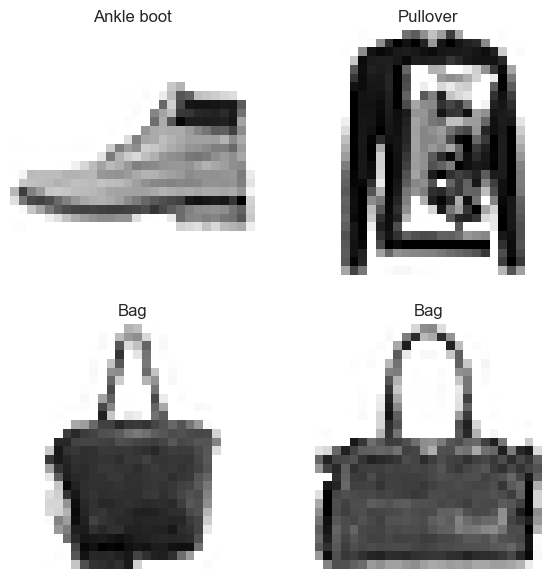

In [29]:
import random
plt.figure(figsize=(7,7))
for i in range(4):
    ax=plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_images)))
    plt.imshow(train_images[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)


# Building a multi-class classification model

For our multi-class classification problem, we can use a similar architecture to our binary classifiers, however, we'r going to have to tweak a few things.

- Input shape = 28x28 (the shape of our images)
- Output shape = 10 (the number of classes we're trying to predict)
- Loss function = tf.keras.losses.CategoricalCrossentropy()
- Output layer activation = softmax (because our problem is multi-class classification)

In [35]:
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
non_norm_history = model_1.fit(train_images,
                               train_labels,
                               epochs=10,
                               validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 1s 391us/step - loss: 2.3572 - accuracy: 0.0984 - val_loss: 2.3046 - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 1s 338us/step - loss: 2.2865 - accuracy: 0.1085 - val_loss: 2.2739 - val_accuracy: 0.1198
Epoch 3/10
1875/1875 [==============================] - 1s 336us/step - loss: 2.2382 - accuracy: 0.1318 - val_loss: 2.2164 - val_accuracy: 0.1378
Epoch 4/10
1875/1875 [==============================] - 1s 338us/step - loss: 1.9510 - accuracy: 0.1983 - val_loss: 1.7726 - val_accuracy: 0.2617
Epoch 5/10
1875/1875 [==============================] - 1s 363us/step - loss: 1.7101 - accuracy: 0.2692 - val_loss: 1.6665 - val_accuracy: 0.2796
Epoch 6/10
1875/1875 [==============================] - 1s 358us/step - loss: 1.6498 - accuracy: 0.2837 - val_loss: 1.6825 - val_accuracy: 0.2748
Epoch 7/10
1875/1875 [==============================] - 1s 347us/step - loss: 1.6247 - accuracy: 0.2866 - val_loss: 1.6114 -